## Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Dataset

In [2]:
# Load the dataset
data = pd.read_csv("IMDB Dataset.csv")


In [3]:
# Display the first few rows of the dataset
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Preprocessing

In [4]:
# Encode sentiment labels
# you can use label encoder as well
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24860\1244137092.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [5]:
# Remove duplicates
print("Duplicates in Dataset: ",data.duplicated().sum())
data.drop_duplicates(inplace = True)


Duplicates in Dataset:  418


In [6]:
# Convert reviews to lowercase
data['review'] = data['review'].str.lower()

In [7]:
# Remove HTML tags from reviews
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text
data['review'] = data['review'].apply(remove_html_tags)


In [8]:
# Remove stopwords from reviews
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Intilize Stopwords
stop_words = set(stopwords.words('english'))

# Apply Stopwords
data['review'] = data['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Remove URLs from reviews
data['review'] = data['review'].str.replace('http\S+|www.\S+', '', case=False)

## Split Data

In [10]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

## Tokenize and Pad Sequences

In [11]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [12]:
# Prepare target variables
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

## Build and Train LSTM Model

In [13]:
# Build the LSTM model
model = Sequential()
# input_dim = tokenizer size
# output_dim = dimension of vector that you want to represent
model.add(Embedding(input_dim=5000, output_dim=128 ,  input_shape=(200,)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [16]:
# Train the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 529s 1s/step - accuracy: 0.8267 - loss: 0.3915 - val_accuracy: 0.8641 - val_loss: 0.3248
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 535s 989ms/step - accuracy: 0.8931 - loss: 0.2712 - val_accuracy: 0.8781 - val_loss: 0.3210
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 481s 945ms/step - accuracy: 0.9126 - loss: 0.2281 - val_accuracy: 0.8690 - val_loss: 0.3242
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.9262 - loss: 0.1958 - val_accuracy: 0.8765 - val_loss: 0.3307
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 526s 947ms/step - accuracy: 0.9328 - loss: 0.1752 - val_accuracy: 0.8702 - val_loss: 0.3450


## Evaluate Model

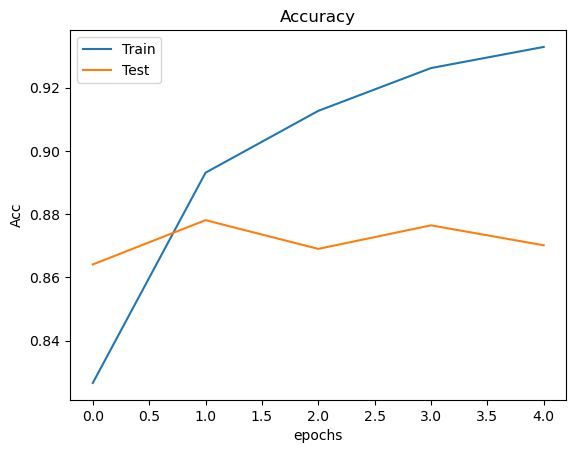

In [17]:
# Plot training and validation accuracy
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [18]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.8656 - loss: 0.3456
Test Loss: 0.34563151001930237
Test Accuracy: 0.8655843734741211


## Logistic Regression

In [19]:
# Import libraries for Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# Prepare data for Logistic Regression
A = data['review']
B = data['sentiment']

In [21]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(A,B, test_size=0.2, random_state=42)


In [22]:
# Transform text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to 5000 features for simplicity
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [23]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500)  # Increase max_iter if convergence issues occur
log_reg.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=500)

In [24]:
# Make Predictions
y_pred = log_reg.predict(X_test_tfidf)

In [25]:
# Evaluate Logistic Regression model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


## Save Models

In [26]:
# Import pickle to save models
import pickle

In [27]:
# Save tokenizer
pickle.dump(tokenizer ,open('tokenizer.pkl' , 'wb'))

In [28]:
# Save LSTM model
pickle.dump(model ,open('model.pkl' , 'wb'))